<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/weather_data_call_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
weather = pd.read_csv("https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/external_datasets/Weather%20Datasets/Wisconsin_Weather_WY2017-2023.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,37,39,41,43,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DAPR_ATTRIBUTES', 'MDPR', 'MDPR_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES',
       'WESD', 'WESD_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT03',
       'WT03_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES',
       'WT06', 'WT06_ATTRIBUTES', 'WT11', 'WT11_ATTRIBUTES', 'AWND',
       'AWND_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'WESF', 'WESF_ATTRIBUTES',
       'WSF2', 'WSF2_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES', 'WT09', 'WT09_ATTRIBUTES'],
      dtype='object')

In [ ]:
weather.TMIN.describe()
# https://www.google.com/search?q=mean+temperature+wisconsin

count    83685.000000
mean        35.554604
std         20.466151
min        -39.000000
25%         22.000000
50%         36.000000
75%         53.000000
max         79.000000
Name: TMIN, dtype: float64

In [ ]:
weather.STATION.unique()

array(['USC00472839', 'USC00475808', 'USC00478937', 'USC00475563',
       'USC00476518', 'USC00475364', 'USC00475164', 'USC00475120',
       'USC00478951', 'USC00476398', 'USC00473405', 'USC00476678',
       'USC00474195', 'USC00204104', 'USC00475017', 'USC00471078',
       'USC00475932', 'USC00476922', 'USC00470045', 'USC00478827',
       'USC00476208', 'USC00472001', 'USC00475255', 'USC00476827',
       'USC00474482', 'USC00478267', 'USC00476200', 'USC00477113',
       'USC00478027', 'USC00475516', 'USC00474546', 'USC00204090',
       'USC00478171', 'USC00470273', 'USW00014898', 'US1WIWN0015',
       'USC00454338', 'USC00476330', 'USC00470239', 'USC00470855',
       'USC00470696', 'US1WIAS0011', 'USC00475091', 'USC00478349'],
      dtype=object)

In [ ]:
weather.NAME.unique()

array(['FOND DU LAC WWTP, WI US', 'NEILLSVILLE 3 ESE, WI US',
       'WAUKESHA WWTP, WI US', 'MONDOVI, WI US', 'PHELPS, WI US',
       'MERRILL, WI US', 'MATHER 3 NW, WI US',
       'MARSHFIELD EXPERIMENTAL FARM, WI US', 'WAUPACA, WI US',
       'PARK FALLS DNR HQ, WI US', 'HANCOCK EXPERIMENTAL FARM, WI US',
       'PLYMOUTH WWTP, WI US', 'KEWAUNEE, WI US', 'IRONWOOD, MI US',
       'MANITOWOC, WI US', 'BRODHEAD WWTP, WI US', 'NEW LONDON, WI US',
       'RACINE WWTP, WI US', 'AFTON JANESVILLE WWTP, WI US',
       'VIROQUA, WI US', 'OCONTO 4 W, WI US', 'DARLINGTON WWTP, WI US',
       'MEDFORD, WI US', 'PRAIRIE DU CHIEN, WI US',
       'LAKE MILLS WWTP, WI US', 'STURGEON BAY EXPERIMENTAL FARM, WI US',
       'OCONOMOWOC WWTP, WI US', 'RHINELANDER, WI US',
       'SPOONER EXPERIMENTAL FARM, WI US', 'MINOCQUA, WI US',
       'LANCASTER 4 WSW, WI US', 'IRON MTN KINGSFORD WWTP, MI US',
       'STEVENS POINT, WI US', 'UW ARBORETUM MADISON, WI US',
       'GREEN BAY A S INTERNATIONAL AIRPORT,

In [ ]:
stevens_point = weather[weather.NAME=="STEVENS POINT, WI US"]
stevens_point["DATE"] = pd.to_datetime(stevens_point.DATE)

<ipython-input-18-38e92e8e7824>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stevens_point["DATE"] = pd.to_datetime(stevens_point.DATE)


In [ ]:
uwwi22 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
uwwi21 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2021.csv")
uwwi20 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2020.csv")
uwwi = pd.concat([uwwi22, uwwi21, uwwi20])
uwwi["Interaction_CreateStamp"] = pd.to_datetime(uwwi.Interaction_CreateStamp, utc=True)
uwwi["Interaction_EditStamp"] = pd.to_datetime(uwwi.Interaction_EditStamp, utc=True)

In [ ]:
stevens_point = stevens_point.iloc[1187:,:]

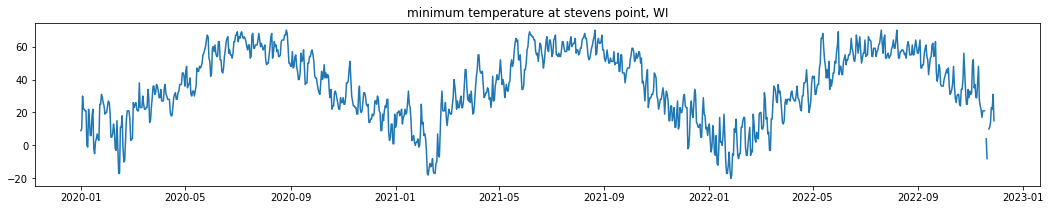

In [ ]:
plt.figure(figsize=(18,3))
plt.plot(stevens_point.DATE, stevens_point.TMIN)
plt.title("minimum temperature at stevens point, WI")
plt.show()

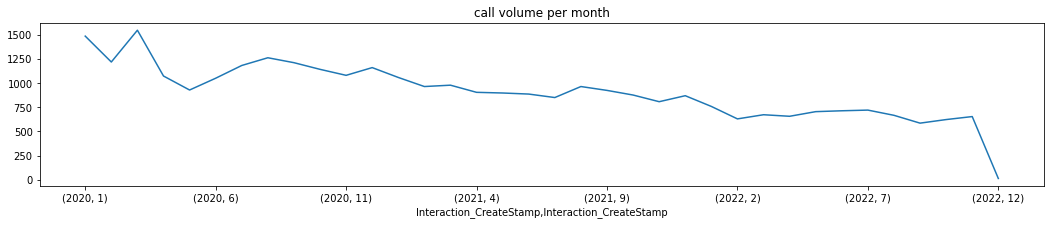

In [ ]:
plt.figure(figsize=(18,3))
uwwi["Interaction_CreateStamp"].groupby([uwwi.Interaction_CreateStamp.dt.year, uwwi.Interaction_CreateStamp.dt.month]).agg('count').plot()
plt.title("call volume per month")
plt.show()
# there might be a weak relationship between temperature and call volume: extreme temperatures --> more calls

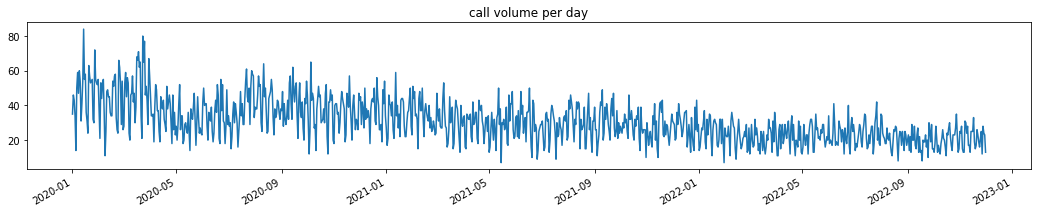

In [ ]:
plt.figure(figsize=(18,3))
uwwi["Interaction_CreateStamp"].dt.floor('d').value_counts().plot()
plt.title("call volume per day")
plt.show()

In [ ]:
uwwi["Interaction_CreateStamp"][uwwi.InteractionOption_SwfPrimaryNeeds=="['Shelter']"]
# shelter label only since april 2022

4      2022-12-01 14:58:26.516401+00:00
10     2022-12-01 03:03:04.446059+00:00
15     2022-11-30 21:37:21.279956+00:00
20     2022-11-30 17:36:32.901939+00:00
38     2022-11-29 21:14:56.638230+00:00
                     ...               
5091   2022-04-12 14:31:27.872616+00:00
5092   2022-04-12 14:02:00.451293+00:00
5094   2022-04-12 13:20:32.965771+00:00
5102   2022-04-12 04:45:30.248365+00:00
5295   2022-04-04 00:49:06.357149+00:00
Name: Interaction_CreateStamp, Length: 732, dtype: datetime64[ns, UTC]